# Runtime and Metrics comparison for w48 vs w03

This notebook contains some quick aggregation and plotting of the usage statistics generated with `build-gather-resource-usage-qg `.

In [10]:
from lsst.daf.butler import Butler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#butler22 = Butler('/repo/main', collections=['u/yusra/resource_usage_d_2023_11_22'])
#butler24 = Butler('/repo/main', collections=['u/yusra/resource_usage_d_2023_11_24'])
butler24 = Butler('/repo/main', collections=['HSC/runs/RC2/w_2023_50/DM-42194'])
butler22 = Butler('/repo/main', collections=['HSC/runs/RC2/w_2023_39/DM-40985'])
butler30 = Butler('/repo/main', collections=['HSC/runs/RC2/w_2024_02/DM-42454'])
#butler = Butler('/repo/main', collections=['u/yusra/resource_usage_d_2023_11_29'])
#butler = Butler('/repo/main', collections=['HSC/runs/RC2/w_2023_43/DM-41354'])

In [11]:
#butler03 = Butler('/repo/dc2', collections=['2.2i/runs/test-med-1/w_2023_49/DM-42037'])
butler03 = Butler('/repo/main', collections=['HSC/runs/RC2/w_2024_02/DM-42454'])

In [12]:
res = butler30.registry.queryDatasetTypes() 
resList = list(set(res))

In [13]:
label = [("compareObjectToTruth", "analysis"),
("histPlot_skyObject", "analysis"),
("matchObjectToTruth", "analysis"),
("match_astromRefCat_objectTable", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_galaxies", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_all_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_sky_all", "analysis"),
("plot_CircAp12_sub_PSF_meas_gals_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_gals", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_stars_scatter", "analysis"),
("plot_E1Diff_magDiff_scatter", "analysis"),
("plot_E1Diff_scatter", "analysis"),
("plot_E1Diff_sky", "analysis"),
("plot_E2Diff_magDiff_scatter", "analysis"),
("plot_E2Diff_scatter", "analysis"),
("plot_E2Diff_sky", "analysis"),
("plot_PSFFluxSN_meas_sky_all", "analysis"),
("plot_RhoStatistics", "analysis"),
("plot_astromRefCat_scatter_tract_dDec", "analysis"),
("plot_astromRefCat_scatter_tract_dRA", "analysis"),
("plot_astromRefCat_sky_tract_dDec", "analysis"),
("plot_astromRefCat_sky_tract_dRA", "analysis"),
("plot_ri_gr_cmodel", "analysis"),
("plot_ri_gr_psf", "analysis"),
("plot_shapeSizeFractionalDiff_magDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_sky", "analysis"),
("plot_wFit_CModel", "analysis"),
("plot_wFit_PSF", "analysis"),
("plot_xFit_CModel", "analysis"),
("plot_xFit_PSF", "analysis"),
("plot_yFit_CModel", "analysis"),
("plot_yFit_PSF", "analysis"),
("skyPlot_skyObject", "analysis"),
("assembleCoadd", "drp"),
("calibrate", "drp"),
("characterizeImage", "drp"),
("consolidateAssocDiaSourceTable", "drp"),
("consolidateDiaSourceTable", "drp"),
("consolidateForcedSourceOnDiaObjectTable", "drp"),
("consolidateForcedSourceTable", "drp"),
("consolidateFullDiaObjectTable", "drp"),
("consolidateHealSparsePropertyMaps", "drp"),
("consolidateObjectTable", "drp"),
("consolidateSourceTable", "drp"),
("consolidateVisitSummary", "drp"),
("deblend", "drp"),
("detectAndMeasureDiaSources", "drp"),
("detection", "drp"),
("drpAssociation", "drp"),
("drpDiaCalculation", "drp"),
("finalizeCharacterization", "drp"),
("forcedPhotCcd", "drp"),
("forcedPhotCcdOnDiaObjects", "drp"),
("forcedPhotCoadd", "drp"),
("forcedPhotDiffOnDiaObjects", "drp"),
("forcedPhotDiffim", "drp"),
("getTemplate", "drp"),
("healSparsePropertyMaps", "drp"),
("isolatedStarAssociation", "drp"),
("isr", "drp"),
("makeCcdVisitTable", "drp"),
("makeVisitTable", "drp"),
("makeWarp", "drp"),
("measure", "drp"),
("mergeDetections", "drp"),
("mergeMeasurements", "drp"),
("selectGoodSeeingVisits", "drp"),
("subtractImages", "drp"),
("templateGen", "drp"),
("transformDiaSourceCat", "drp"),
("transformForcedSourceOnDiaObjectTable", "drp"),
("transformForcedSourceTable", "drp"),
("transformObjectTable", "drp"),
("transformSourceTable", "drp"),
("writeForcedSourceOnDiaObjectTable", "drp"),
("writeForcedSourceTable", "drp"),
("writeObjectTable", "drp"),
("writeSourceTable", "drp"),
         
("AB1", "faro"),
("AD1_design", "faro"),
("AD2_design", "faro"),
("AD3_design", "faro"),
("AF1_design", "faro"),
("AF2_design", "faro"),
("AF3_design", "faro"),
("AM1", "faro"),
("AM2", "faro"),
("AM3", "faro"),
("PA1", "faro"),
("PF1_design", "faro"),
("TE1", "faro"),
("TE2", "faro"),
("TE3", "faro"),
("TE4", "faro"),
("matchCatalogsPatch", "faro"),
("matchCatalogsPatchMultiBand", "faro"),
("matchCatalogsTract", "faro"),
("matchCatalogsTractGxsSNR5to80", "faro"),
("matchCatalogsTractMag17to21p5", "faro"),
("matchCatalogsTractStarsSNR5to80", "faro"),
("modelPhotRepGal1", "faro"),
("modelPhotRepGal2", "faro"),
("modelPhotRepGal3", "faro"),
("modelPhotRepGal4", "faro"),
("modelPhotRepStar1", "faro"),
("modelPhotRepStar2", "faro"),
("modelPhotRepStar3", "faro"),
("modelPhotRepStar4", "faro"),
("nsrcMeasVisit", "faro"),
("psfPhotRepStar1", "faro"),
("psfPhotRepStar2", "faro"),
("psfPhotRepStar3", "faro"),
("psfPhotRepStar4", "faro"),
("skyObjectMean", "faro"),
("skyObjectStd", "faro"),
("wPerp", "faro"),
('transformPreSourceTable', "drp"),
('writeRecalibratedSourceTable', "drp"),
('jointcal', "drp"),
('fgcmOutputProducts', "drp"),
('fgcmFitCycle', "drp"),
('writePreSourceTable', "drp"),
('skyCorr', "drp"),
('consolidatePreSourceTable', "drp"),
('fgcmBuildStarsTable', "drp"),
('analyzeObjectTableSurveyCore', "analysis"),
('refCatObjectTract', "analysis"),
('updateVisitSummary', "drp"),
('validateObjectTableCore', "analysis"),
('analyzeMatchedVisitCore', "analysis"),
('fgcmBuildFromIsolatedStars', "drp"),
('selectDeepCoaddVisits', "drp"),
('gbdesAstrometricFit', "drp"),
('catalogMatchTract', "analysis"),

]

labelDF = pd.DataFrame(label)
labelDF.columns = ['task', 'label']


In [14]:
#labelMatch= pd.merge(qq48, labelDF, left_on="task", right_on="task", how="left")
#labelMatch[labelMatch.label.isnull()]['task'].unique()

In [15]:

def makeqq(butler, resList):
    quantileList = []
    for rname in [r.name for r in resList if r.name.endswith('usage')]:
        if "gatherResourceUsage" in rname:
            continue
        try:
            parq = butler.get(rname)
        except Exception as e:
            print(e)
            continue
        df = parq.quantile([0,0.01,0.05,.32,.50,.68,.95,.99, 1], numeric_only=True).reset_index()
        df['task'] = rname.replace('_resource_usage', '')
        df['quanta'] = len(parq)
        df['integrated_runtime'] = parq["run_time"].sum()
        quantileList.append(df[["index", "quanta", "task", "memory", "init_time", "run_time", 'integrated_runtime']])

    qq = pd.concat(quantileList)
    qq["memoryGB"] = qq['memory']/1073741824
    qq['integrated_runtime_hrs'] = qq['integrated_runtime']/3600.
    return qq

def pivot(qq, labelDF):
    memoryGB = pd.pivot_table(qq, values='memoryGB', columns=['index'], index=['task'])
    runtime = pd.pivot_table(qq, values='run_time', columns=['index'], index=['task'])
    memoryGB = memoryGB.add_prefix('memGB_')
    runtime = runtime.add_prefix('runtime_')

    memrun = pd.merge(memoryGB.reset_index(), runtime.reset_index())
    memrun = pd.merge(qq[['task','quanta', 'integrated_runtime_hrs']].drop_duplicates().sort_values('task'), memrun)
    #memrun = pd.merge(labelDF, memrun)
    return memrun

#qq = makeqq(butler03, resList)
#memrun = pivot(qq, labelDF)

qq22 = makeqq(butler22, resList)
memrun22 = pivot(qq22, labelDF)

qq24 = makeqq(butler24, resList)
memrun24 = pivot(qq24, labelDF)

qq30 = makeqq(butler30, resList)
memrun30 = pivot(qq30, labelDF)

Dataset modelPhotRepGal4_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset TE3_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset imageDifference_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset TE4_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset psfPhotRepStar1_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset PA1_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset modelPhotRepGal3_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset selectDeepCoaddVisits_resource_usage with data ID {} could not be found in collections ('HSC/runs/RC2/w_2023_39/DM-40985',).
Dataset matc

In [89]:
mergedqq =  pd.merge(qq48, labelDF, left_on="task", right_on="task")
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
ax = sns.catplot(data=mergedqq[(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") & (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('memoryGB'), 
            y="task-quanta", x="memoryGB", hue="integrated_runtime_hrs", height=8)

#ax.set_xticklabels(ax.ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.savefig('figures/w50_memory.png')
plt.show()

NameError: name 'qq48' is not defined

In [90]:
memrun["kb99"] = memrun["memGB_0.99"]*1024
memrun["kb"] = memrun["memGB_1.0"]*1024
memrun["kb95"] = memrun["memGB_0.95"]*1024
memrun[memrun["memGB_0.95"] > 4][["task", "quanta", "kb", "kb99"]].sort_values("kb") 

,task,quanta,kb,kb99
40,fgcmOutputProducts,1,4148.957031,4148.957031
17,analyzeObjectTableCore,3,4357.957031,4353.742656
38,fgcmBuildFromIsolatedStars,1,4917.644531,4917.644531
23,consolidateAssocDiaSourceTable,3,5369.324219,5298.271953
19,assembleCoadd,1281,6042.761719,5241.303125
118,templateGen,1281,6850.992188,5412.249219
35,detection,1281,6850.992188,5494.865625
120,transformForcedSourceOnDiaObjectTable,241,7801.281250,6416.102344
27,consolidateFullDiaObjectTable,3,8113.812500,8003.620156
54,makeVisitTable,1,8230.718750,8230.718750


In [93]:
df = df.reset_index()
df.columns = ["task", "mem"]
pd.merge(memrun[memrun["memGB_0.95"] > 4][["task", "quanta", "kb",  "kb99", "kb95"]], df, 
         how="left", left_on="task", right_on="task")

,task,quanta,kb,kb99,kb95,mem
0,TE1,15,33492.308594,33464.833594,33354.933594,{'requestMemory': 46000}
1,TE2,15,33523.984375,33476.197891,33285.051953,{'requestMemory': 46000}
2,analyzeMatchedVisitCore,3,42948.078125,42876.682188,42591.098437,NaN
3,analyzeObjectTableCore,3,4357.957031,4353.742656,4336.885156,NaN
4,assembleCoadd,1281,6042.761719,5241.303125,4530.839844,{'requestMemory': 8192}
5,consolidateAssocDiaSourceTable,3,5369.324219,5298.271953,5014.062891,{'requestMemory': 5400}
6,consolidateForcedSourceOnDiaObjectTable,3,216489.855469,212456.449453,196322.825391,{'requestMemory': 490000}
7,consolidateForcedSourceTable,3,118227.687500,116440.118984,109289.844922,{'requestMemory': 200000}
8,consolidateFullDiaObjectTable,3,8113.812500,8003.620156,7562.850781,{'requestMemory': 12000}
9,consolidateObjectTable,3,20385.480469,20360.478906,20260.472656,{'requestMemory': 35000}


In [70]:
df

,index,task,mem
0,0,TE1,{'requestMemory': 16384}
1,1,TE2,{'requestMemory': 16384}
2,2,consolidateForcedSourceTable,{'requestMemory': 64000}
3,3,consolidateObjectTable,{'requestMemory': 16384}
4,4,healSparsePropertyMaps,{'requestMemory': 8192}
5,5,matchCatalogsPatch,{'requestMemory': 4096}
6,6,matchCatalogsPatchMultiBand,{'requestMemory': 8196}
7,7,matchCatalogsTract,{'requestMemory': 32000}
8,8,matchCatalogsTractGxsSNR5to80,{'requestMemory': 32000}
9,9,matchCatalogsTractMag17to21p5,{'requestMemory': 24000}


In [91]:
import yaml

file_path = "/sdf/group/rubin/user/yusra/lsst_devel/drp_pipe/bps/resources/HSC/DRP-RC2.yaml"
#file_path = "/sdf/group/rubin/user/yusra/lsst_devel/drp_pipe/bps/resources/LSSTCam-imSim/DRP-test-med-1.yaml"
with open(file_path, 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)

print(yaml_data)
df = pd.DataFrame(yaml_data)
#pd.merge(memrun[memrun["memGB_0.99"]>0][["task", "quanta", "kb"]].sort_values("kb"), df, left_on="task", right_index=True, how="right")

{'pipetask': {'skyCorr': {'requestMemory': 15500}, 'fgcmBuildFromIsolatedStars': {'requestMemory': 8192}, 'fgcmFitCycle': {'requestMemory': 24576}, 'fgcmOutputProducts': {'requestMemory': 8192}, 'assembleCoadd': {'requestMemory': 8192}, 'jointcal': {'requestMemory': 21000}, 'deblend': {'requestMemory': 16384}, 'forcedPhotCoadd': {'requestMemory': 4096}, 'writeObjectTable': {'requestMemory': 16384}, 'consolidateObjectTable': {'requestMemory': 35000}, 'templateGen': {'requestMemory': 5000}, 'healSparsePropertyMaps': {'requestMemory': 30000}, 'getTemplate': {'requestMemory': 5400}, 'consolidateFullDiaObjectTable': {'requestMemory': 12000}, 'consolidateForcedSourceOnDiaObjectTable': {'requestMemory': 490000}, 'transformForcedSourceOnDiaObjectTable': {'requestMemory': 10000}, 'consolidateAssocDiaSourceTable': {'requestMemory': 5400}, 'consolidateForcedSourceTable': {'requestMemory': 200000}, 'makeVisitTable': {'requestMemory': 10000}, 'makeCcdVisitTable': {'requestMemory': 10000}, 'matchCat

In [16]:
#qq30['version'] = "d_2023_11_29"
#qq24['version'] = "d_2023_11_24"
#qq22['version'] = "d_2023_11_22"
qq30['version'] = "w_2024_02"
qq24['version'] = "w_2023_50"
qq22['version'] = "w_2023_39"
both = pd.concat([qq30, qq24, qq22])

In [17]:
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")

In [18]:
mergedqq.task[mergedqq.label.isna()].unique()

array(['analyzeObjectTableCore', 'plot_iz_ri_psf'], dtype=object)

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


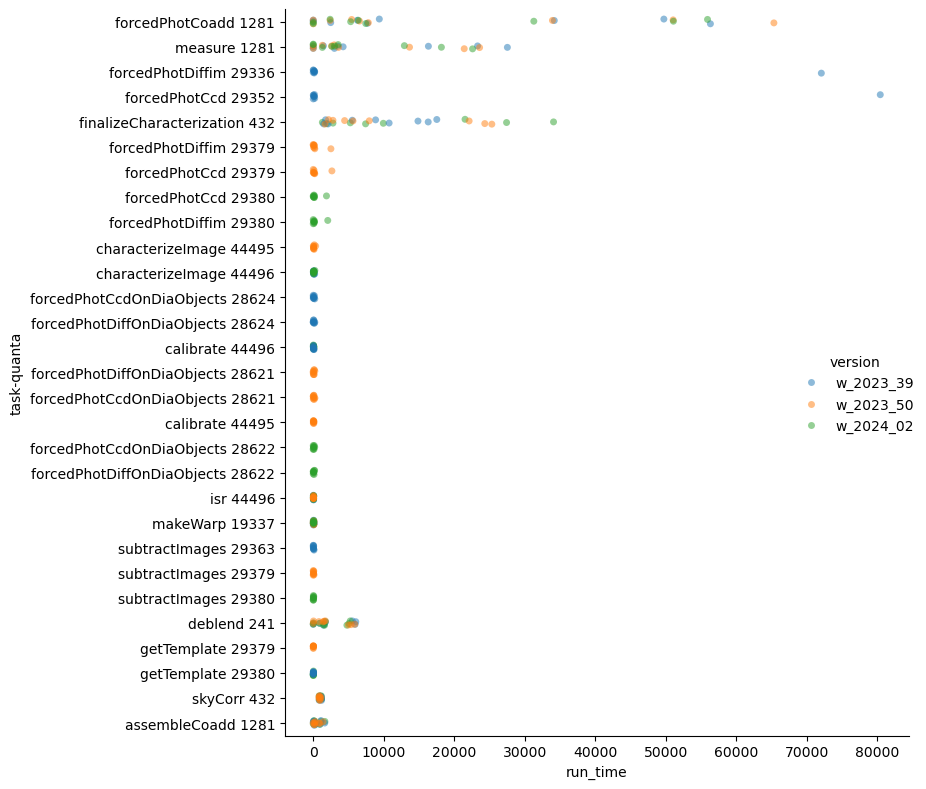

In [19]:
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")
import numpy as np
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
mergedqq['log_runtime'] = np.log10(mergedqq['run_time'])
ax = sns.catplot(data=mergedqq[(mergedqq.integrated_runtime_hrs > 100) & (mergedqq.version != "w_2023_43") &(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") &
                               (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('integrated_runtime', ascending=False), 
            y="task-quanta", x="run_time", hue="version", height=8, alpha=0.5)


plt.tight_layout()
#plt.savefig('/sdf/group/rubin/u/yusra/runtime_d22-d24-d29.png')

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


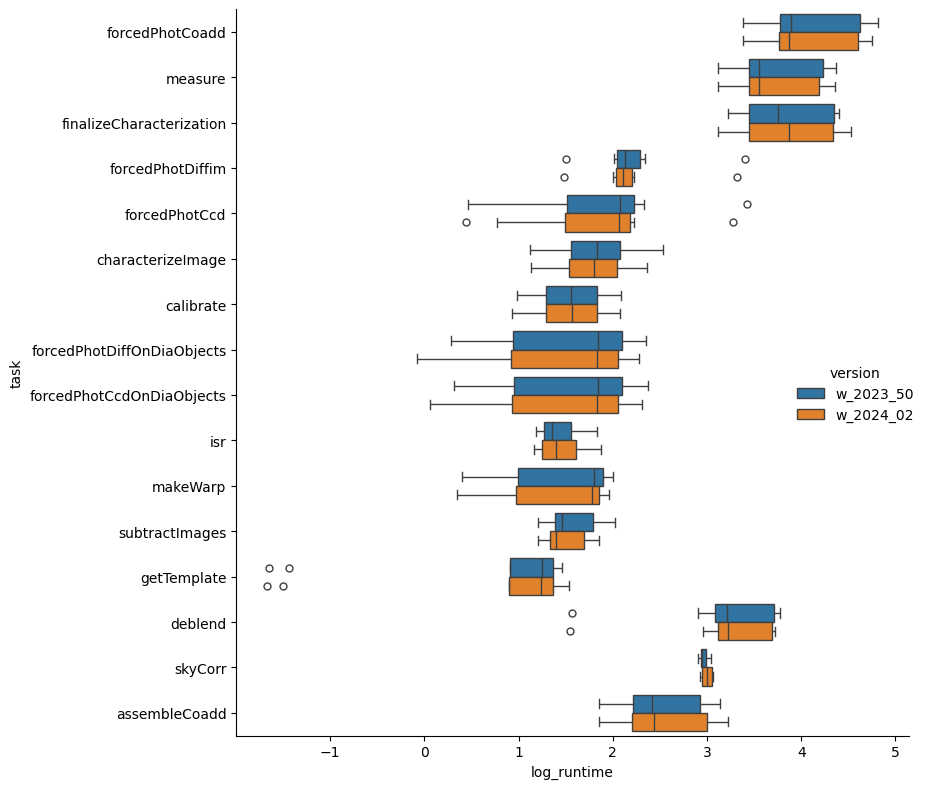

In [39]:
qq30['version'] = "w_2024_02"
qq24['version'] = "w_2023_50"
qq22['version'] = "w_2023_39"
both = pd.concat([qq30, qq24])
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")
import numpy as np
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
mergedqq['log_runtime'] = np.log10(mergedqq['run_time'])

sns.catplot(data=mergedqq[(mergedqq.integrated_runtime_hrs > 100)  &(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") &
                               (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('integrated_runtime', ascending=False), 
            y="task", x="log_runtime", hue="version", height=8,  kind="box")
plt.savefig("w50vsw02logruntime.png")
plt.tight_layout()

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


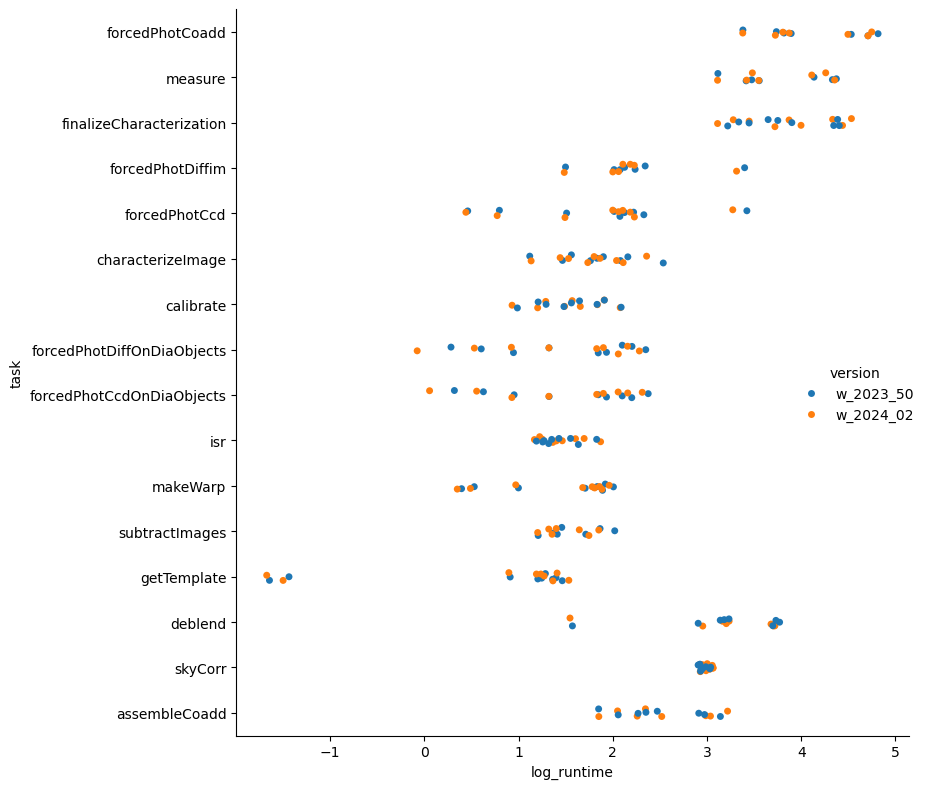

In [36]:
qq30['version'] = "w_2024_02"
qq24['version'] = "w_2023_50"
qq22['version'] = "w_2023_39"
both = pd.concat([qq30, qq24])
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")
import numpy as np
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
mergedqq['log_runtime'] = np.log10(mergedqq['run_time'])

sns.catplot(data=mergedqq[(mergedqq.integrated_runtime_hrs > 100)  &(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") &
                               (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('integrated_runtime', ascending=False), 
            y="task", x="log_runtime", hue="version", height=8, alpha=1.0)
#plt.savefig("w50vsw02logruntime.png")
plt.tight_layout()

In [60]:
qq30[qq30.task == "forcedPhotCoadd"]

,index,quanta,task,memory,init_time,run_time,integrated_runtime,memoryGB,integrated_runtime_hrs,version
0,0.00,1281,forcedPhotCoadd,3.835412e+08,0.000000,0.000000,1.321131e+07,0.357201,3669.807636,w_2024_02
1,0.01,1281,forcedPhotCoadd,3.949642e+08,0.000000,0.000000,1.321131e+07,0.367839,3669.807636,w_2024_02
2,0.05,1281,forcedPhotCoadd,2.674020e+09,0.039595,2391.927122,1.321131e+07,2.490376,3669.807636,w_2024_02
3,0.32,1281,forcedPhotCoadd,4.306310e+09,0.040881,5306.217703,1.321131e+07,4.010564,3669.807636,w_2024_02
4,0.50,1281,forcedPhotCoadd,4.538921e+09,0.041549,6381.323672,1.321131e+07,4.227200,3669.807636,w_2024_02
5,0.68,1281,forcedPhotCoadd,4.793467e+09,0.042217,7447.049605,1.321131e+07,4.464264,3669.807636,w_2024_02
6,0.95,1281,forcedPhotCoadd,5.382205e+09,0.045092,31279.191417,1.321131e+07,5.012569,3669.807636,w_2024_02
7,0.99,1281,forcedPhotCoadd,5.592090e+09,0.048959,51070.784573,1.321131e+07,5.208040,3669.807636,w_2024_02
8,1.00,1281,forcedPhotCoadd,6.071136e+09,0.056580,55912.061202,1.321131e+07,5.654186,3669.807636,w_2024_02


In [61]:
55912.06202/3600

15.531128338888887

In [27]:
mergedqq[mergedqq['index'] == 0.50]

,index,quanta,task,memory,init_time,run_time,integrated_runtime,memoryGB,integrated_runtime_hrs,version,label,task-quanta,log_runtime
4,0.5,241,writeObjectTable,1.088771e+10,0.000316,49.353002,13056.087239,10.139969,3.626691,w_2024_02,drp,writeObjectTable 241,1.693314
13,0.5,160,modelPhotRepGal4,7.321784e+08,0.000655,6.975279,1909.685729,0.681894,0.530468,w_2024_02,faro,modelPhotRepGal4 160,0.843562
22,0.5,29380,transformDiaSourceCat,1.914960e+09,0.034634,0.635346,18292.014587,1.783445,5.081115,w_2024_02,drp,transformDiaSourceCat 29380,-0.196989
31,0.5,3,plot_astromRefCat_scatter_tract_dRA,1.239929e+09,0.000371,0.906354,2.652759,1.154774,0.000737,w_2024_02,analysis,plot_astromRefCat_scatter_tract_dRA 3,-0.042702
40,0.5,432,updateVisitSummary,7.587942e+08,0.005418,268.167548,119361.527563,0.706682,33.155980,w_2024_02,drp,updateVisitSummary 432,2.428406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,0.5,15,AF3_design,5.155881e+08,0.000529,7.446708,128.488453,0.480179,0.035691,w_2023_50,faro,AF3_design 15,0.871964
2380,0.5,6,consolidateHealSparsePropertyMaps,6.954496e+08,0.000464,40.942660,219.635618,0.647688,0.061010,w_2023_50,drp,consolidateHealSparsePropertyMaps 6,1.612176
2389,0.5,241,matchCatalogsPatchMultiBand,5.271155e+09,0.000295,742.556897,279136.071679,4.909145,77.537798,w_2023_50,faro,matchCatalogsPatchMultiBand 241,2.870730
2398,0.5,15,AF1_design,6.590710e+08,0.000556,76.428284,977.794626,0.613808,0.271610,w_2023_50,faro,AF1_design 15,1.883254


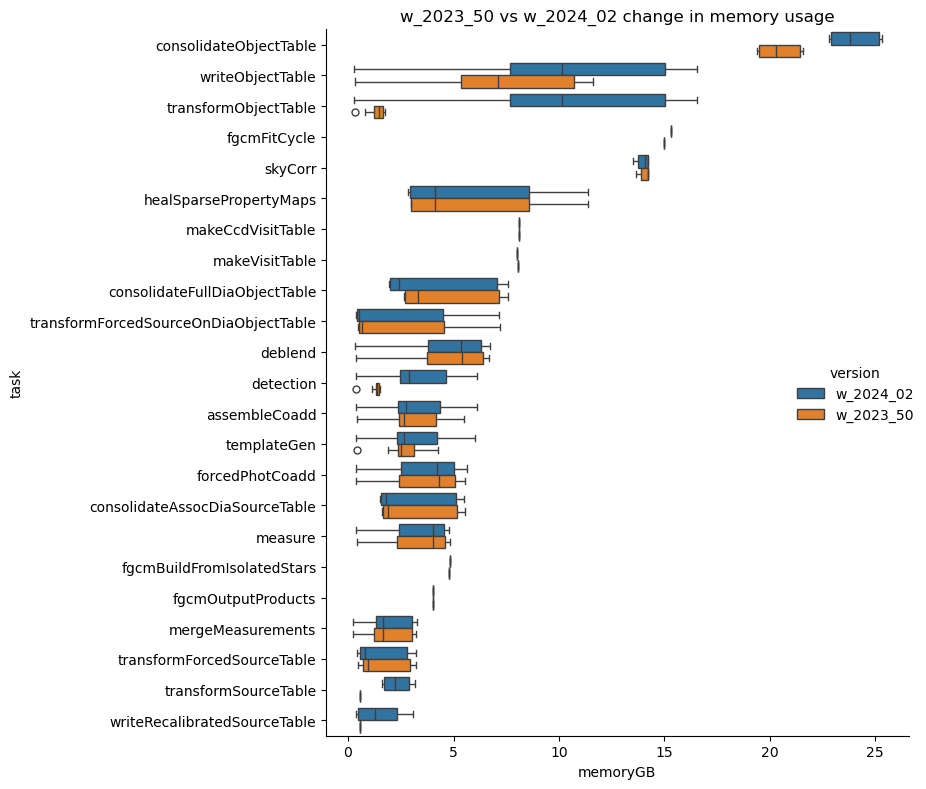

In [59]:

mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")

mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))

ax = sns.catplot(data=mergedqq[(mergedqq.task.isin(mergedqq[(mergedqq.memoryGB > 3)]["task"].unique())) &
                                (mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") & (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('memoryGB', ascending=False), 
            y="task", x="memoryGB", hue="version", height=8, kind="box")


plt.title("w_2023_50 vs w_2024_02 change in memory usage")
plt.tight_layout()
plt.savefig("w02-vs-w50-memory.png")

In [47]:
print(18225.822645/3600.)
print(11076.13688/3600.)

5.0627285125
3.076704688888889


In [53]:
mergedqq[mergedqq.task.isin(mergedqq[(mergedqq.memoryGB > 1)]["task"].unique())]

,index,quanta,task,memory,init_time,run_time,integrated_runtime,memoryGB,integrated_runtime_hrs,version,label,task-quanta
0,0.00,241,writeObjectTable,3.202703e+08,0.000000,0.000000,13056.087239,0.298275,3.626691,w_2024_02,drp,writeObjectTable 241
1,0.01,241,writeObjectTable,7.621370e+08,0.000269,4.765289,13056.087239,0.709795,3.626691,w_2024_02,drp,writeObjectTable 241
2,0.05,241,writeObjectTable,8.255533e+09,0.000278,38.161621,13056.087239,7.688564,3.626691,w_2024_02,drp,writeObjectTable 241
3,0.32,241,writeObjectTable,1.039091e+10,0.000297,46.980289,13056.087239,9.677289,3.626691,w_2024_02,drp,writeObjectTable 241
4,0.50,241,writeObjectTable,1.088771e+10,0.000316,49.353002,13056.087239,10.139969,3.626691,w_2024_02,drp,writeObjectTable 241
...,...,...,...,...,...,...,...,...,...,...,...,...
2407,0.50,3,plot_CircAp12_sub_PSF_meas_stars_scatter,9.796362e+08,0.000437,1.534060,4.673662,0.912357,0.001298,w_2023_50,analysis,plot_CircAp12_sub_PSF_meas_stars_scatter 3
2408,0.68,3,plot_CircAp12_sub_PSF_meas_stars_scatter,1.024759e+09,0.000443,1.578936,4.673662,0.954381,0.001298,w_2023_50,analysis,plot_CircAp12_sub_PSF_meas_stars_scatter 3
2409,0.95,3,plot_CircAp12_sub_PSF_meas_stars_scatter,1.092444e+09,0.000452,1.646250,4.673662,1.017418,0.001298,w_2023_50,analysis,plot_CircAp12_sub_PSF_meas_stars_scatter 3
2410,0.99,3,plot_CircAp12_sub_PSF_meas_stars_scatter,1.102471e+09,0.000453,1.656222,4.673662,1.026756,0.001298,w_2023_50,analysis,plot_CircAp12_sub_PSF_meas_stars_scatter 3


In [54]:
TASK = 'measure'

print("d22", qq48[qq48.task == TASK].integrated_runtime.mean())
print("d24",qq03[qq03.task == TASK].integrated_runtime.mean())

d22 11076.136880332
d24 18225.822645488


In [56]:
TASK = 'measure'

print("d22", qq48[qq48.task == TASK].integrated_runtime.mean()/3600)
print("d24",qq03[qq03.task == TASK].integrated_runtime.mean()/3600)

d22 3.076704688981111
d24 5.062728512635555


In [60]:
TASK = 'forcedPhotCoadd'

print("d22", qq48[qq48.task == TASK].integrated_runtime.mean()/3600)
print("d24",qq03[qq03.task == TASK].integrated_runtime.mean()/3600)

d22 6.729519936067779
d24 6.299332370515833


In [86]:
TASK = 'measure'
print("d22", qq22[qq22.task == TASK].integrated_runtime.mean()/3600)
print("d24",qq24[qq24.task == TASK].integrated_runtime.mean()/3600)
print("d30",qq30[qq30.task == TASK].integrated_runtime.mean()/3600)

d22 3.076704688981111
d24 5.062728512635555
d30 3.2017559585549997


In [59]:
qq03[qq03.task == TASK]

,index,quanta,task,memory,init_time,run_time,integrated_runtime,memoryGB,integrated_runtime_hrs,version
0,0.00,240,calibrate,7.345930e+08,0.527909,44.667408,43722.307569,0.684143,12.145085,d_2023_11_24
1,0.01,240,calibrate,7.348677e+08,0.543445,56.777491,43722.307569,0.684399,12.145085,d_2023_11_24
2,0.05,240,calibrate,7.462892e+08,0.581056,67.455118,43722.307569,0.695036,12.145085,d_2023_11_24
3,0.32,240,calibrate,7.602060e+08,0.627463,142.317707,43722.307569,0.707997,12.145085,d_2023_11_24
4,0.50,240,calibrate,7.668531e+08,0.655830,176.488957,43722.307569,0.714188,12.145085,d_2023_11_24
5,0.68,240,calibrate,7.742485e+08,0.701607,224.704451,43722.307569,0.721075,12.145085,d_2023_11_24
6,0.95,240,calibrate,7.957205e+08,0.897262,310.295369,43722.307569,0.741072,12.145085,d_2023_11_24
7,0.99,240,calibrate,1.080272e+09,1.005428,371.711945,43722.307569,1.006081,12.145085,d_2023_11_24
8,1.00,240,calibrate,1.652560e+09,1.033629,385.643340,43722.307569,1.539066,12.145085,d_2023_11_24


In [67]:
qq30[qq30.task == TASK]

NameError: name 'TASK' is not defined